# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Pythagoreisches Komma

<div style="background-color:lightyellow">

**Aufgabe 1:**

Berechnet die Frequenzverhältnisse mit der Funktion `calc_ratio` wie folgt in einem Loop:

1. Verhältnis (`ratio`) berechnen
2. prüfen, ob sich die resultierende Frequenz immer noch innerhalb der Oktave befindet ($\mathrm{ratio} \geq 2$)
    - wenn ja: Frequenz durch $2$ dividieren (<=> inkrementiere `num2`)
    - nein: weiter im Loop
3. `num3` und `num2` um $1$ inkrementieren

Die Tabelle kann euch als Kontrolle dienen:


|engl. Schreibweise| C | G | D | A | E | B | F#/Gb | C#/Db | G#/Ab | D#/Eb | A#/Bb | F | C |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|dt. Schreibweise|C|G|D|A|E|H|Fis/Ges|Cis/Des|Gis/As|Dis/Es|Ais/B|F|C|
|Verhältnis|$\frac{3^0}{2^0}$|$\frac{3^1}{2^1}$|$\frac{3^2}{2^3}$|$\frac{3^3}{2^4}$|$\frac{3^4}{2^6}$|$\frac{3^5}{2^7}$|$\frac{3^6}{2^9}$|$\frac{3^7}{2^{11}}$|$\frac{3^8}{2^{12}}$|$\frac{3^9}{2^{14}}$|$\frac{3^{10}}{2^{15}}$|$\frac{3^{11}}{2^{17}}$|$\frac{3^{12}}{2^{19}}$|
    
</div>

In [3]:
pitchclasses = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

def calc_cents(f1, f2):
    return 1200 * np.log2(f2 / f1) # log2(f2) - log2(f1)

def calc_ratio(num3, num2):
    return 3 ** num3 / 2 ** num2

midinote = 0
num2 = 0
num3 = 0

for quint_num in range(13):
    
    # ratio berechnen
    ratio = calc_ratio(num3, num2)
    
    # prüfen, ob sich die resultierende frequenz immer noch innerhalb der Okave befindet   
    if ratio >= 2:
        # ja: dann num2 um 1 inkrementieren und ratio nochmals berechnen
        num2 += 1
        ratio = calc_ratio(num3, num2)
#         continue
     
    print('%2d, %2s, %2d, %2d' % (quint_num, pitchclasses[midinote], num3, num2))
    sinus = np.sin(np.linspace(0, 1, 44100) * 2 * np.pi * 261.63 * ratio)
    ipd.display(ipd.Audio(sinus, rate=44100))
    
    # num3 und num2 um 1 inkrementieren
    num2 += 1
    num3 += 1
    
    midinote = (midinote + 7) % 12

print('\n Pythagorean Comma:', calc_cents(1, calc_ratio(12, 19)))
sinus = np.sin(np.linspace(0, 1, 44100) * 2 * np.pi * 261.63 * calc_ratio(0, 0))
ipd.display(ipd.Audio(sinus, rate=44100))
sinus = np.sin(np.linspace(0, 1, 44100) * 2 * np.pi * 261.63 * calc_ratio(12, 19))
ipd.display(ipd.Audio(sinus, rate=44100))

 0,  C,  0,  0


 1,  G,  1,  1


 2,  D,  2,  3


 3,  A,  3,  4


 4,  E,  4,  6


 5,  B,  5,  7


 6, F#,  6,  9


 7, C#,  7, 11


 8, G#,  8, 12


 9, D#,  9, 14


10, A#, 10, 15


11,  F, 11, 17


12,  C, 12, 19



 Pythagorean Comma: 23.460010384649014


In [9]:
# q12 = (3 / 2)
# o7

q12 = np.log2((3/2) ** 12)
print('12 Quinten', q12)

# Die Größe von 7 Oktaven
ok7 = np.log2(2 ** 7)
print('7 Oktaven:',ok7)

pKomma = q12 - ok7
print('Pyth. komma:', pKomma, '(Verhältnis-Unterschied)')

print('\nPyth. Komma (Cent):', calc_cents(2 ** q12, 2 ** ok7))

print('\nPyth. Komma (Cent):', 1200 * pKomma)

print('')
h = np.log2(16/15)
print('Halbton:',h)
print(h-pKomma)

12 Quinten 7.019550008653874
7 Oktaven: 7.0
Pyth. komma: 0.019550008653873796 (Verhältnis-Unterschied)

Pyth. Komma (Cent): -23.46001038464858

Pyth. Komma (Cent): 23.460010384648555

Halbton: 0.09310940439148145
0.07355939573760766


# Envelopes





In der folgenden Abbildung ist eine ADRS-Envelope (Attack-Decay-Sustain-Release) dargestellt:

![Lineare Envelope](adsr_linear.png)

<br/>

<div style="background-color:lightyellow">
    
**Aufgabe 2:**

Schreibt eine Funktion `generate_adsr` um eine ADSR-Envelope (ähnlich wie in der Abbildung) zu generieren.
    
</div>

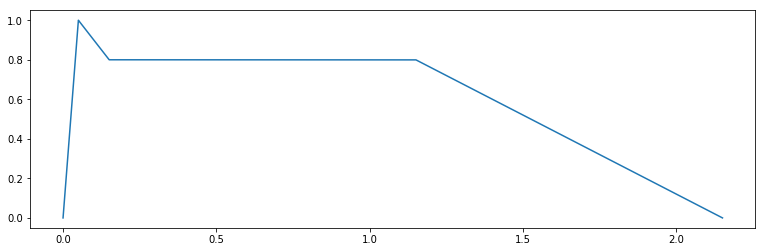

In [13]:
def generate_adsr(attack=0.5, decay=0.1, sustain_val=0.8, sustain_len=1, release=1, sr=44100):
    a = np.linspace(0, 1, int(sr * attack))
    d = np.linspace(1, sustain_val, int(sr * decay))
    s = np.linspace(sustain_val, sustain_val, int(sr * sustain_len))
#     s = np.ones(sr * sustain_len) * sustain_val
    r = np.linspace(sustain_val, 0, int(sr * release))
    return np.concatenate((a, d, s, r))

sr = 44100

adsr = generate_adsr(0.05, 0.1, 0.8, 1, 1, sr=44100)

t = np.linspace(0, np.shape(adsr)[0] / sr, np.shape(adsr)[0])

plt.figure(figsize=(13, 4))
plt.plot(t, adsr)

sin = np.sin(t * 2 * np.pi * 440)
sin = sin * adsr
ipd.display(ipd.Audio(sin, rate=sr))

<div style="background-color:lightyellow">
    
**Optionale Aufgabe:**

Oftmals werden Envelopes als Exponential-Funktionen gerneriert.

Was muss man an der Funktion `generate_adsr` ändern, um eine "kurvige" Envelope zu generieren?

![Exponentielle Envelope](adsr_exp.png)
    
</div>

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


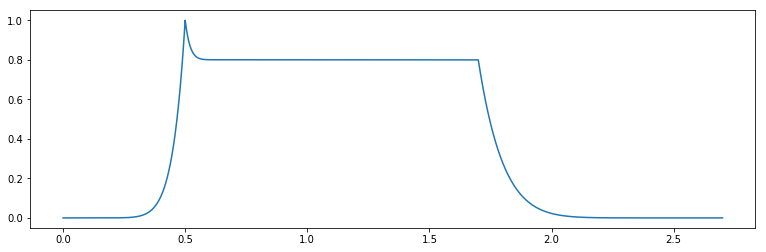

In [24]:
import math as m

# make_exponential

def generate_exp_adsr(attack=0.5, decay=0.1, sustain_val=0.8, sustain_len=1, release=1, sr=44100, degree=2):
    a = np.linspace(0, 1, sr * attack) ** degree
    d = (np.linspace(((1 - sustain_val) ** (1 / degree)), 0, sr * decay) ** degree) + sustain_val
    s = np.linspace(sustain_val, sustain_val, sr * sustain_len)
    r = np.linspace((sustain_val ** (1 / degree)), 0, sr * release) ** degree
    return np.concatenate((a, d, s, r))
    

sr = 44100

adsr = generate_exp_adsr(0.5, 0.2, 0.8, 1, 1, sr=44100, degree=10)

t = np.linspace(0, np.shape(adsr)[0] / sr, np.shape(adsr)[0])

plt.figure(figsize=(13, 4))
plt.plot(t, adsr)

sin = np.sin(t * 2 * np.pi * 440)
sin = sin * adsr
ipd.display(ipd.Audio(sin, rate=sr))